## Digit Classfication using CNN


#### Import Libraries / Packages

In [1]:
#!pip install keras
#!pip install tensorflow

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
plt.ion()

C:\Users\Raj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Import Data

In [3]:
#Load the Mnist data
%time (X_train,y_train),(X_test,y_test)=mnist.load_data()

Wall time: 1.09 s


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
#Train & Test data - Flattening
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

# Converting to float
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

# normalize values on 0-1 scale
X_train /=255 
X_test /=255

#print
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

60000 train samples
10000 test samples


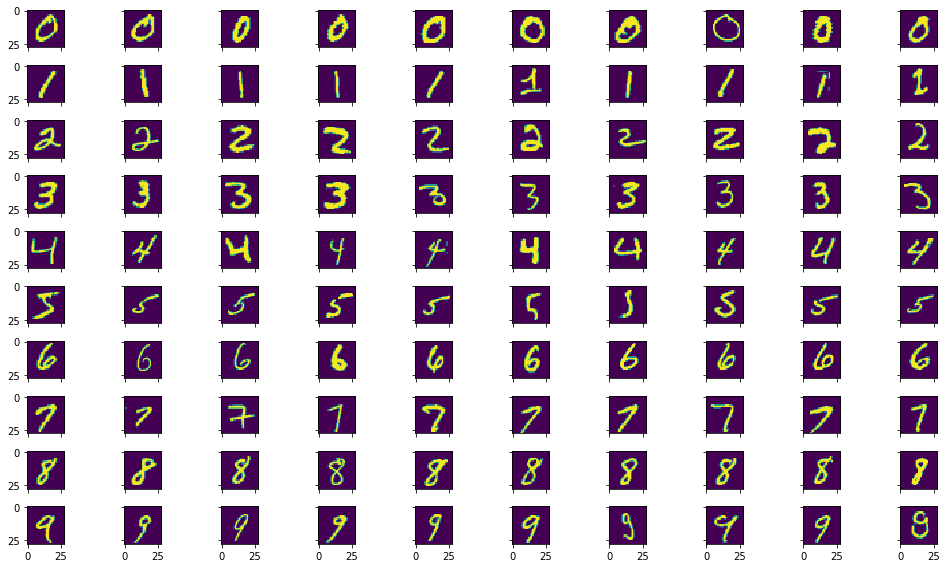

In [6]:
# show digits 
f, ax = plt.subplots(10,10, figsize=(14,8), sharex=True, sharey=True)
for i in range(10):
    indexes = np.where(y_train == i)[0][:10]
    for j in range(10):
        ax[i,j].imshow(X_train[indexes[j]].reshape(28,28))
plt.gray()
plt.tight_layout()
plt.show()

### Feature Engineering

#### Output Feature Encoding 

In [7]:
# before encoding
y_train[10] 

3

In [8]:
# converting labels to features ( one-hot encoding )
nb_classes=10 # 10 digits - 10 classes
Y_train=np_utils.to_categorical(y_train,nb_classes)
Y_test=np_utils.to_categorical(y_test,nb_classes)

In [9]:
# after encoding
Y_train[10] 

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building Convolutional Neural Network

In [10]:
#Creating a sequential model
model=Sequential()

In [11]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten


In [12]:
#use Conv2D to create our first convolutional layer, with 32 filters, 5x5 filter size, 
#input_shape = input image with (height, width, channels), activate ReLU to turn negative to zero
model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu'))

In [13]:
#Check model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [14]:
#add a pooling layer for down sampling
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [16]:
# add another conv layer with 16 filters, 3x3 filter size, 
model.add(Conv2D(16, (3, 3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        4624      
Total params: 5,456
Trainable params: 5,456
Non-trainable params: 0
_________________________________________________________________


In [17]:
#set 20% of the layer's activation to zero, to void overfit
model.add(Dropout(0.2))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 16)        0         
Total params: 5,456
Trainable params: 5,456
Non-trainable params: 0
_________________________________________________________________


In [19]:
#convert a 2D matrix in a vector
model.add(Flatten())

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
Total params: 5,456
Trainable params: 5,456
Non-trainable params: 0
_________________________________________________________________


In [21]:
#add fully-connected layers, and ReLU activation
model.add(Dense(130, activation='relu'))
model.add(Dense(50, activation='relu'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 130)               208130    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                6550      
Total para

In [23]:
#add a fully-connected layer with softmax function to squash values to 0...1 -----------------------------
#Add output layer to the model
model.add(Dense(10))
model.add(Activation('softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 130)               208130    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                6550      
__________

In [25]:
#compiling the model
sgd=SGD()
%time model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

Wall time: 46.9 ms


In [26]:
#Fitting the model
model.fit(X_train,Y_train,batch_size=500,nb_epoch=2,validation_split=0.2,verbose=1)

C:\Users\Raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 73s 2ms/step - loss: 2.2352 - acc: 0.2054 - val_loss: 2.0483 - val_acc: 0.4584
Epoch 2/2
48000/48000 [==============================] - 81s 2ms/step - loss: 1.3953 - acc: 0.6072 - val_loss: 0.6435 - val_acc: 0.8125


In [27]:
score = model.evaluate(X_test, Y_test, batch_size=256)

10000/10000 [==============================] - 7s 712us/step


In [28]:
'accuracy : {0:.2f}'.format(score[1])

'accuracy : 0.81'

In [29]:
#Predicting on Test Data
predicted = model.predict_classes(X_test)

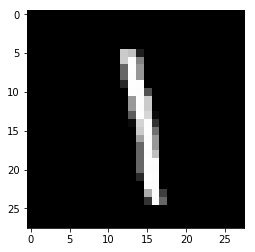

actual : 1 predicted : 1


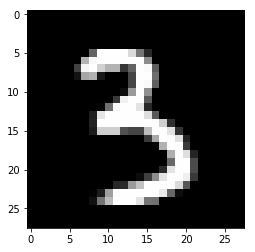

actual : 3 predicted : 3


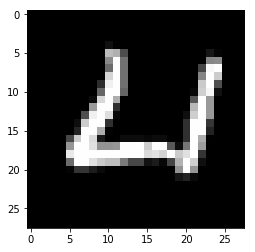

actual : 4 predicted : 6


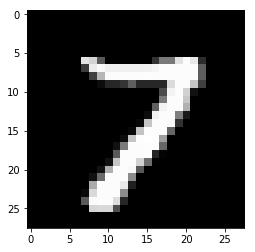

actual : 7 predicted : 7


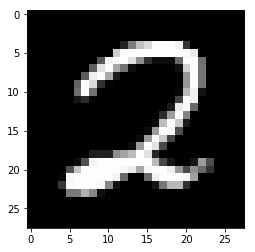

actual : 2 predicted : 2


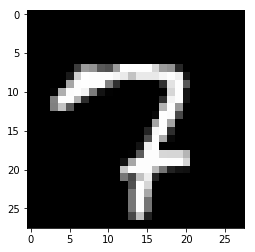

actual : 7 predicted : 7


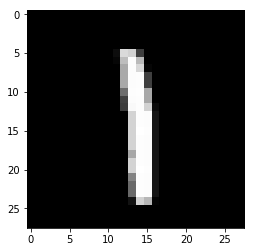

actual : 1 predicted : 1


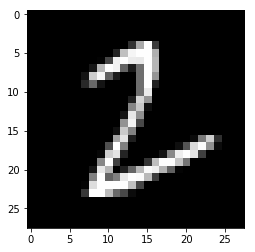

actual : 2 predicted : 3


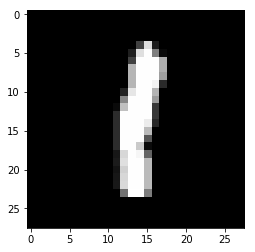

actual : 1 predicted : 1


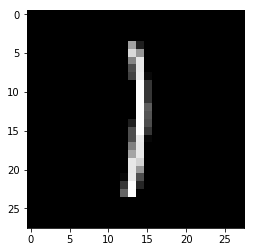

actual : 1 predicted : 1


In [30]:
for i in range(31,41):
    actual_class = np.where(Y_test[i] == 1)[0][0]
    predcited_class = predicted[i]
    plt.imshow(X_test[i].reshape(28,28))
    plt.show()
    print('actual : {0} predicted : {1}'.format(actual_class, predcited_class))